In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
file_path = '/content/drive/MyDrive/Dataset/Telco_customer_churn.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df_copy = df.copy()

In [ ]:
df.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


#Exploratory Data Analysis(EDA) & Cleaning


In [ ]:
df.shape

(7043, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#Total Charges is in Object so we have to convert it into numeric value

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

## Check missing values

In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

# There are 5174 missing values in churn reason. lets gauge the total scenario from the churn value

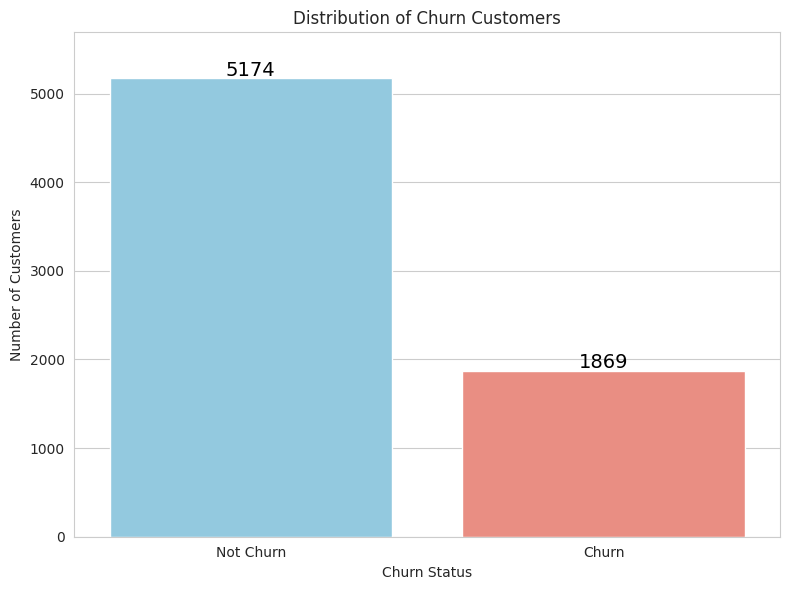

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
exit_counts = df['Churn Value'].value_counts()
exit_percentages = exit_counts
colors = ['skyblue', 'salmon']
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=exit_counts.index, y=exit_counts.values, palette=colors)
ax.set(xlabel='Churn Status', ylabel='Number of Customers', title='Distribution of Churn Customers')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.ylim(top=max(exit_counts.values) * 1.1)

for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')
plt.tight_layout()
plt.show()


# There are 11 missing values in the total charges

In [ ]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


# Fill in the missing values using monthly charges and tenure months column. if we multiply these two columns value we can fill the missing values of total charges


In [ ]:
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])
df = df.drop(['calc_charges'], axis=1)

In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
import plotly.express as px
c = ['darkseagreen', 'teal']
px.pie(df.groupby('Churn Label')['CustomerID'].count().reset_index(),
       values='CustomerID',
       names='Churn Label',
       color_discrete_sequence=c,
       title='Pie Chart for Churn Label')

**26.5% of customers are in churn this means 1869 customers might leave.**

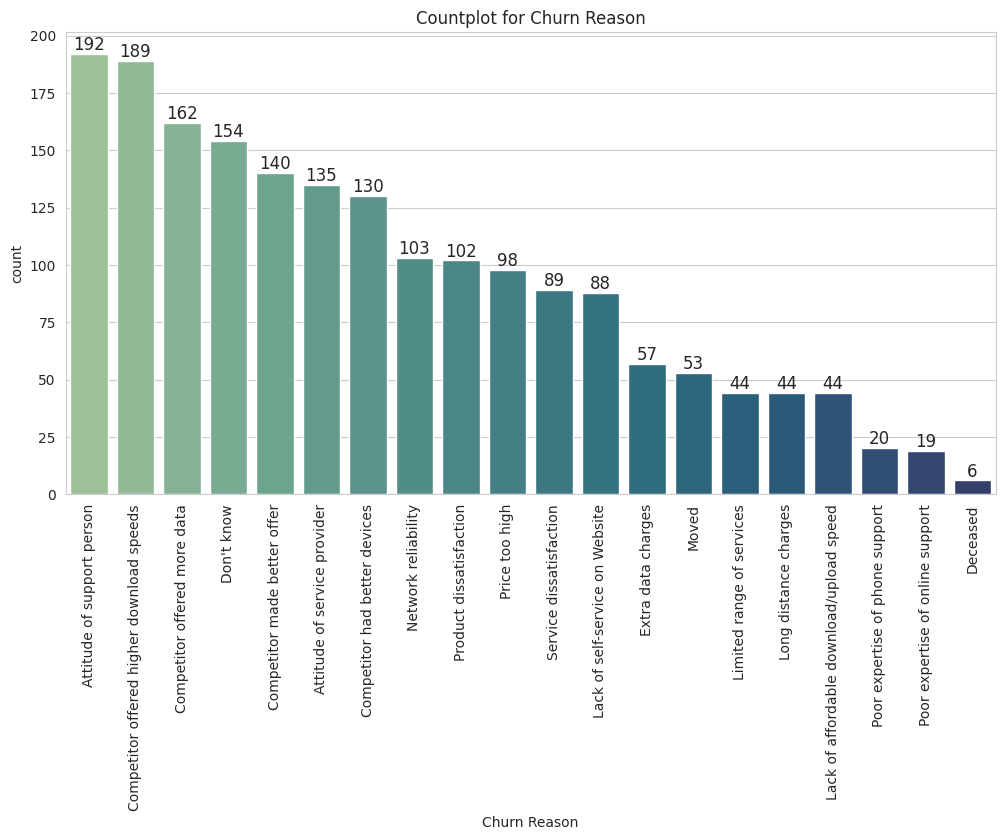

In [ ]:
p = 'crest'
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme()

ax = sns.countplot(data=df, x='Churn Reason', palette=p, order=df['Churn Reason'].value_counts().index)
ax.set_title('Countplot for Churn Reason')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for container in ax.containers:
    ax.bar_label(container)

plt.show()


**These are the 20 reasons which lead to customers leave.**

In [ ]:
df['Churn Reason'].fillna('Not Applicable', inplace=True)

def categorize_reason(reason):
    if reason=='Not Applicable':
        return np.nan
    elif reason.split(' ')[0]=='Competitor':
        return 'Competition'
    elif reason.split(' ')[-1]=='dissatisfaction':
        return 'Dissatisfaction'
    elif (reason.split(' ')[0]=='Moved') | (reason.split(' ')[0]=='Deceased'):
        return 'Need'
    elif (reason.split(' ')[0]=='Price') | (reason.split(' ')[-1]=='charges'):
        return 'Price'
    elif (reason.split(' ')[0]=='Poor') | (reason.split(' ')[0]=='Attitude'):
        return 'Attitude'
    elif reason=="Don't know":
        return 'Others'
    else:
        return 'Product'



df['Root Cause'] = df['Churn Reason'].apply(lambda x : categorize_reason(str(x)))

df['Root Cause'].unique()

array(['Competition', 'Need', 'Price', 'Dissatisfaction', 'Product',
       'Others', 'Attitude', nan], dtype=object)

In [ ]:
df1 = df[df['Root Cause'].notnull()]['Root Cause'].value_counts().sort_values(ascending=False).reset_index()
df1.rename(columns={'index':'Root Cause', 'Root Cause':'count'}, inplace=True)
df1['cumulative '] = df1['count'].cumsum() / df1['count'].sum() * 100

df1

,Root Cause,count,cumulative
0,Competition,621,33.226324
1,Attitude,366,52.808989
2,Product,279,67.736758
3,Price,199,78.384163
4,Dissatisfaction,191,88.603531
5,Others,154,96.843232
6,Need,59,100.000000


**According to the upper table , the root cause of the Competition should try to be addressed first, followed by the Attitude, Product, Price and so on to minimize the majority of customer churn.**

## Geographic Analysis of Churn:

In [ ]:
df.groupby(['Country','State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

In [ ]:
fig = px.scatter_mapbox(df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['CustomerID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(50),
             x='City',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

**We see that the largest number of customers in the Los Angeles, San Diego, San Francisco area.**

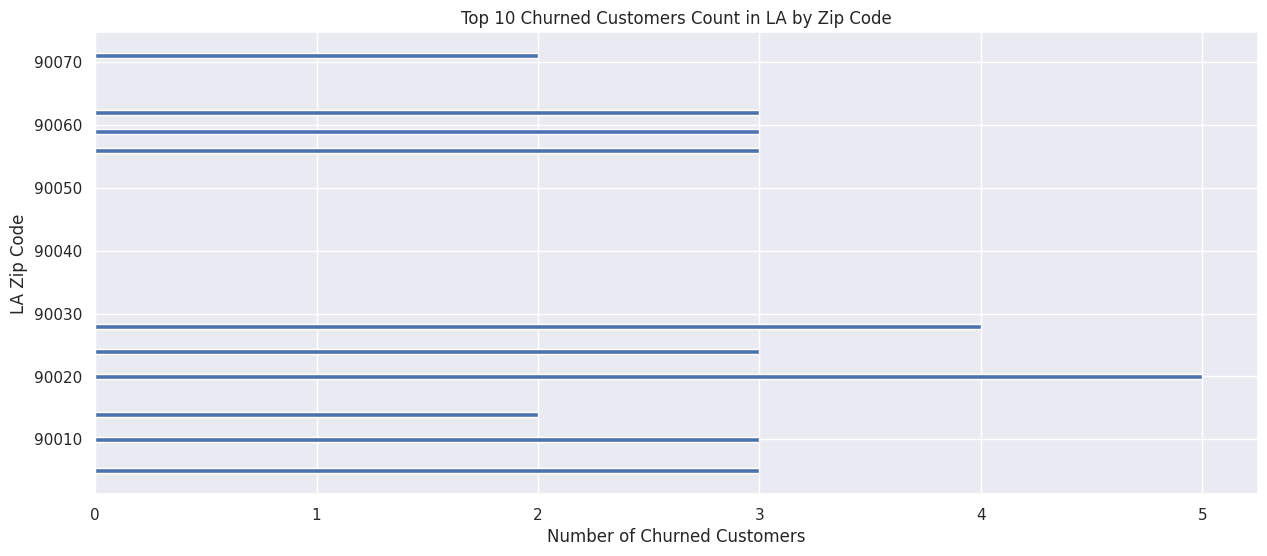

In [ ]:
churn_yes_states = df.loc[(df['Churn Label'] == 'Yes') & (df['City'] == 'Los Angeles'), 'Zip Code']
state_counts = churn_yes_states.value_counts().nlargest(10)

# Get the value counts of each state
LAZipCnt = churn_yes_states.value_counts().nlargest(10)
plt.figure(figsize=(15, 6))

plt.barh(LAZipCnt.index, state_counts.values)

plt.title('Top 10 Churned Customers Count in LA by Zip Code')
plt.xlabel('Number of Churned Customers')
plt.ylabel('LA Zip Code')

plt.show()

**90020 zip code is the highest followed by 90030 ,90060 and so on**


## Geo spatial view of the Lat Long coordinates

In [ ]:
import folium

churned_df = df.loc[df['Churn Label'] == 'Yes']
churn_yes_LatLong = churned_df[["Latitude", "Longitude", "City"]]

# Create map object
m = folium.Map(location=[churn_yes_LatLong['Latitude'].mean(), churn_yes_LatLong['Longitude'].mean()], zoom_start=8)

# Add markers for each point in the dataset
for index, row in churn_yes_LatLong.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(m)

m


# Demographic Analysis

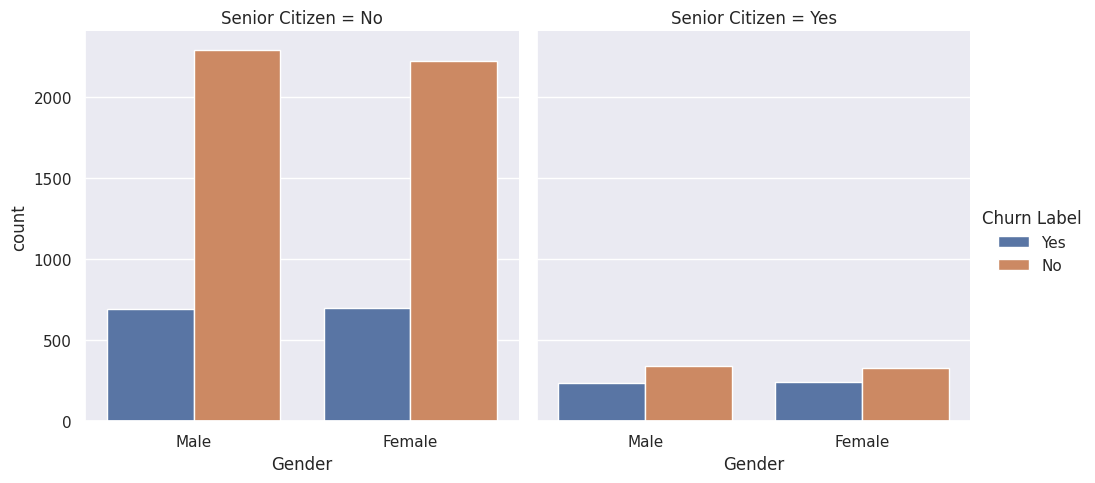

In [ ]:
sns.catplot(x='Gender', hue='Churn Label', col='Senior Citizen', kind='count', data=df)

**Ratio of Senior Citizen vs. Non Senior Citizen**

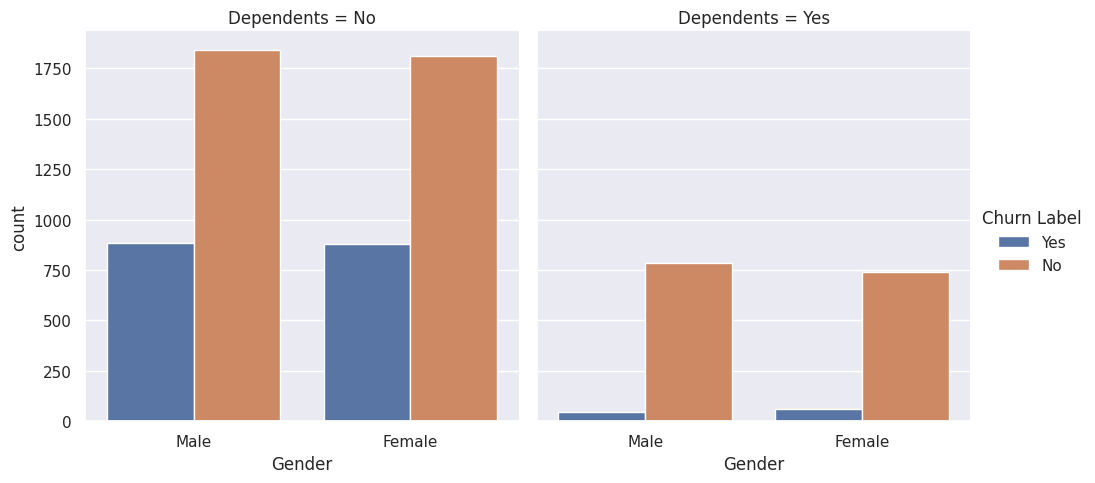

In [ ]:
sns.catplot(x='Gender', hue='Churn Label', col='Dependents', kind='count', data=df)

**Shows that Males with dependents are churning less than females. However customers without dependents have higher churn values**

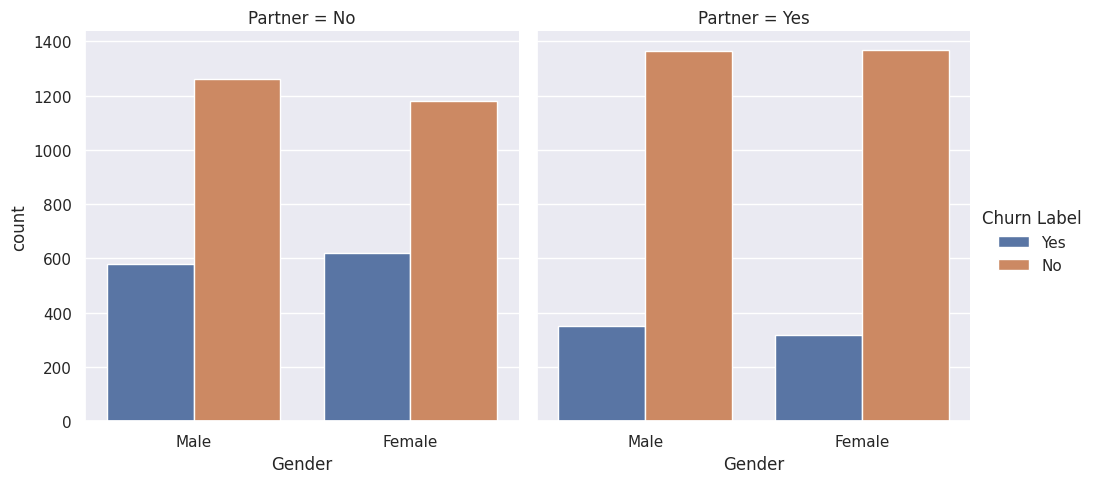

In [ ]:
sns.catplot(x='Gender', hue='Churn Label', col='Partner', kind='count', data=df)

**Customers with partners has lower churn chances than the customers without partners**

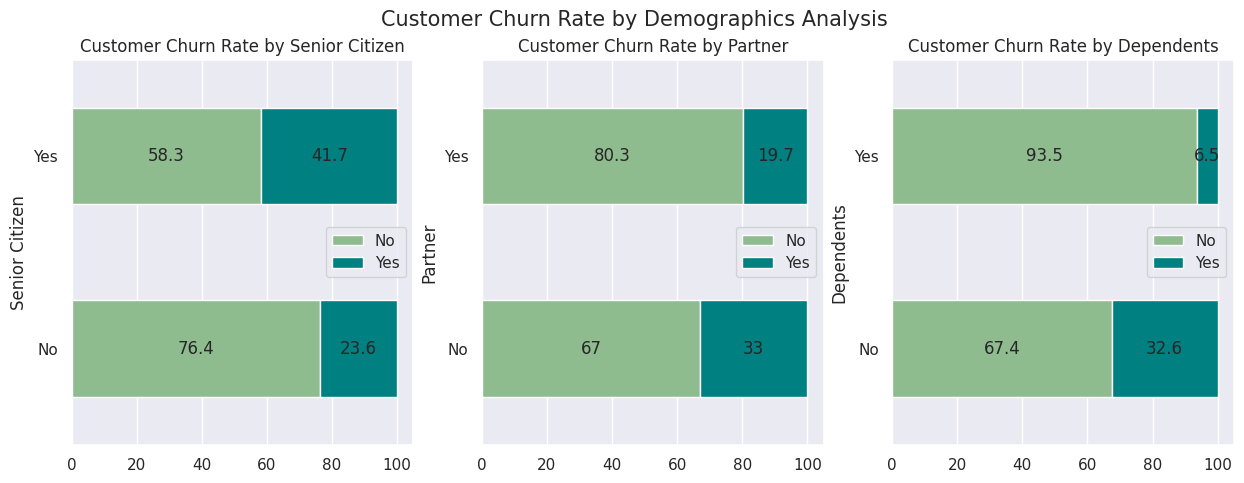

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Customer Churn Rate by Demographics Analysis', fontsize=15)

demo = ['Senior Citizen', 'Partner', 'Dependents']

for i, col in enumerate(demo, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, color=c, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')




1. Around (41.7%) of senior citizen customers have left, compared to 23.6% of non senior citizen customers. This suggests that senior citizen customers are more likely to churn.

2. Customers without a partner have a higher chance of churn than customers with a partner, as (33%) of customers without a partner have left.

3. Customers without children, parents or grandparents are prone to churn, as nearly a third (32.6%) of them have left, compared to only 6.5% of customers with dependents.

# Data Preprocessing(Feature Engineering & Feature Selection)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FormatDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        df = X.copy()

        df['Partner'] = df.Partner.map({'Yes':1,'No':0})
        df['Senior Citizen'] = df["Senior Citizen"].map({'Yes':1,'No':0})
        df['Dependents'] = df.Dependents.map({'Yes':1,'No':0})
        df['Phone Service'] = df["Phone Service"].map({'Yes':1,'No':0})
        df['Multiple Lines'] = df["Multiple Lines"].map({'Yes':1,'No':0,'No phone service':0})

        df["IsFiberOptics"] = df["Internet Service"].map({'DSL':0,'Fiber optic':1,'No':0})
        df["IsDSL"] = df["Internet Service"].map({'DSL':1,'Fiber optic':0,'No':0})
        df["Internet Service"] = df["Internet Service"].map({'DSL':1,'Fiber optic':1,'No':0})
        df['Online Security'] = df["Online Security"].map({'Yes':1,'No':0,'No internet service':0})
        df['Online Backup'] = df["Online Backup"].map({'Yes':1,'No':0,'No internet service':0})
        df['Device Protection'] = df["Device Protection"].map({'Yes':1,'No':0,'No internet service':0})
        df['Tech Support'] = df["Tech Support"].map({'Yes':1,'No':0,'No internet service':0})
        df['Streaming TV'] = df["Streaming TV"].map({'Yes':1,'No':0,'No internet service':0})
        df['Streaming Movies'] = df["Streaming Movies"].map({'Yes':1,'No':0,'No internet service':0})
        df["Monthly Contract"] = df["Contract"].map({'Month-to-month':1, 'Two year':0, 'One year':0})
        df["Yearly Contract"] = df["Contract"].map({'Month-to-month':0, 'Two year':2, 'One year':1})
        df['Paperless Billing'] = df["Paperless Billing"].map({'Yes':1,'No':0})
        df['IsElectricCheck'] = df["Payment Method"].map({'Electronic check': 1, 'Bank transfer (automatic)': 0,
                                                          'Credit card (automatic)': 0, 'Mailed check': 0})

        # remove some column
        df = df.drop(["CustomerID", "Count","City", "Zip Code", "Country", "State", "Lat Long", "Churn Score", "CLTV", "Churn Reason",
                      "Contract", "Payment Method", "Churn Label", "Gender"], axis=1)

        # First we convert TotalCharges to float and then replace with tenure * monthly charges
        # Convert 'Total Charges' column to numeric with errors set to 'coerce'
        df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
        df.loc[df['Total Charges'].isnull()==True,'Total Charges'] = df['Monthly Charges'] * df['Tenure Months']

        return df

In [ ]:
from sklearn.model_selection import train_test_split

formatDataframe = FormatDataFrame()

# split dataset
train_set, test_set = train_test_split(df_copy, test_size=0.25, random_state=42)
dfse = formatDataframe.fit_transform(train_set)
customer_tr = formatDataframe.fit_transform(train_set)

## Service Utilization Analysis:

<Axes: xlabel='Multiple Lines', ylabel='count'>

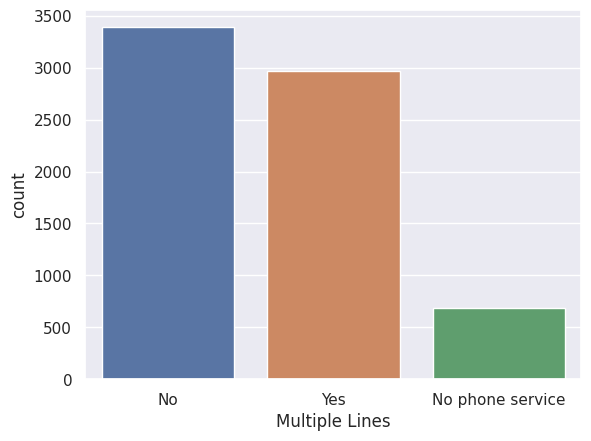

In [ ]:
sns.countplot(x = 'Multiple Lines',data = df)

In [ ]:
df[['Multiple Lines', 'Churn Value']].groupby(['Multiple Lines']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Multiple Lines,
Yes,0.286099
No,0.250442
No phone service,0.249267


<Axes: xlabel='Internet Service', ylabel='count'>

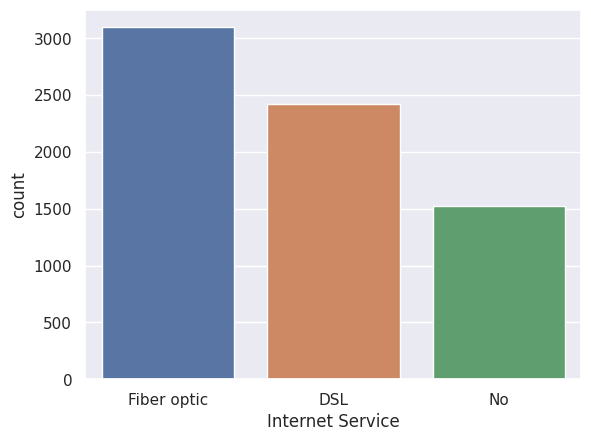

In [ ]:
sns.countplot(x = 'Internet Service',data = df,order= df['Internet Service'].value_counts().index)

In [ ]:
df[['Internet Service', 'Churn Value']].groupby(['Internet Service']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Internet Service,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


**Internet service charges lead to dissatisfaction among customers, especially those who have been with the company for a long time.**

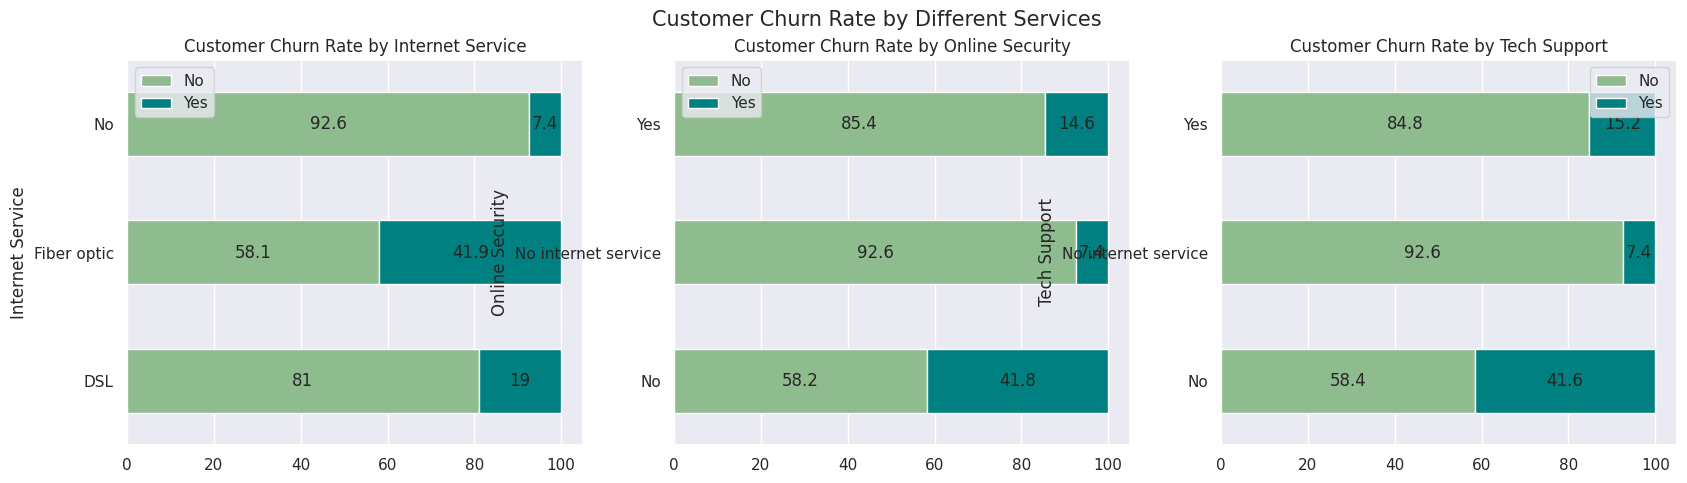

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Customer Churn Rate by Different Services', fontsize=15)

service = ['Internet Service', 'Online Security', 'Tech Support']

for i, col in enumerate(service, start=0):
    df1 = df.groupby([col, 'Churn Label']).size().unstack()
    df1.apply(lambda x : round((x/x.sum())*100,1), axis=1).plot(kind='barh', stacked=True, color=c, ax=ax[i])
    ax[i].set_title('Customer Churn Rate by {}'.format(col))
    ax[i].legend(loc='best')
    ax[i].grid(axis='y')
    for container in ax[i].containers:
        ax[i].bar_label(container, label_type='center')


1. Almost half (41.9%) of customers with fiber-optic internet service have left, which means they are more prone to churn.

2. Customers who do not subscribe to additional online security services tend to churn, as nearly (41.8%) have left, while only 14.6% of customers with additional online security services have left.

3. Almost(41.6%) of customers who don't have a technical support plan have left, compared to just 15.2% of those who have. This means that customers without technical support plan are a greater likelihood to churning.



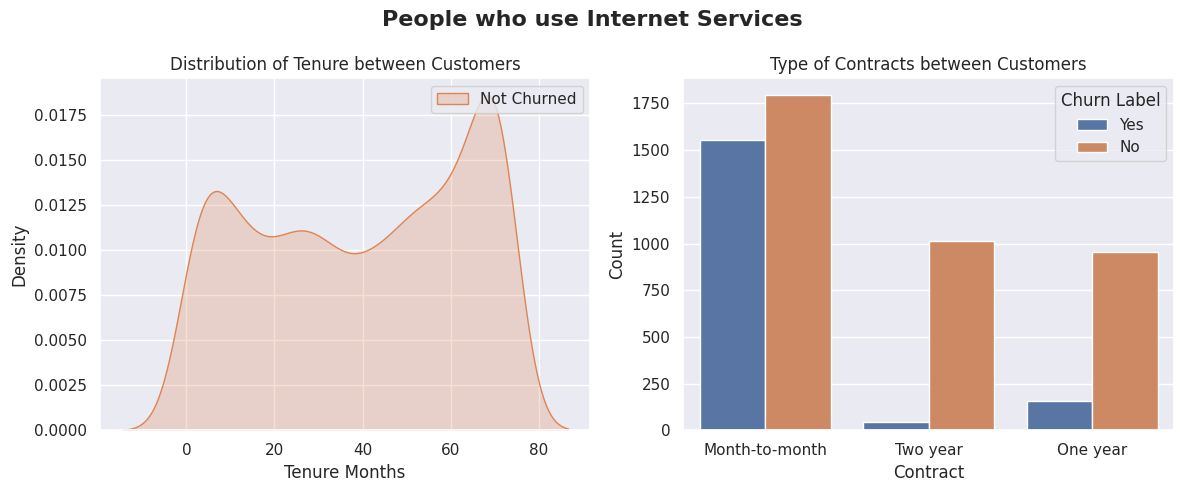

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

churned = df[(df['Internet Service'] == 1) & (customer_tr['Churn Value'] == 1)]
not_churned = df[(customer_tr['Internet Service'] == 1) & (df['Churn Value'] == 0)]

# 1st subplot: density plot of tenure for churned and non-churned customers who use internet service
sns.kdeplot(churned['Tenure Months'], fill=True, label='Churned', ax=axes[0])
sns.kdeplot(not_churned['Tenure Months'], fill=True, label='Not Churned', ax=axes[0])
axes[0].set_xlabel('Tenure Months')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Tenure between Customers')
axes[0].legend()

# 2nd subplot: count plot of contracts for customers who use internet service
sns.countplot(data=df[df['Internet Service']!="No"], x='Contract', hue='Churn Label', ax=axes[1])
axes[1].set_title('Type of Contracts between Customers')
axes[1].set_xlabel('Contract')
axes[1].set_ylabel('Count')


plt.suptitle('People who use Internet Services', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()

**Customers with longer tenure months generally exhibit increased loyalty, showing a propensity to stay with the company. Furthermore, those on a monthly contract are more likely to churn compared to their counterparts on a yearly contract. Additionally, it is noteworthy that customers favor opting for yearly contracts, especially when engaging with certain internet services offered by the company.**

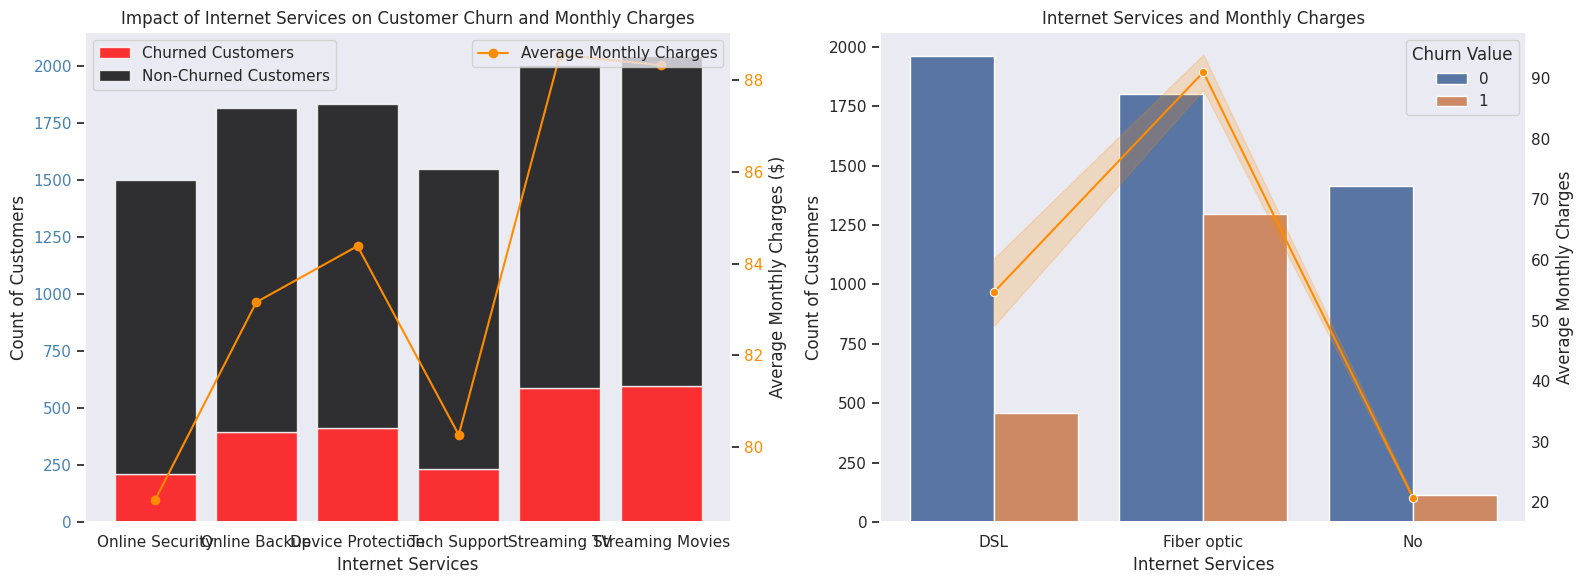

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

internet_services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
churn_count = [dfse[dfse["Churn Value"]==1][service].sum() for service in internet_services]
not_churn_count = [dfse[dfse["Churn Value"]==0][service].sum() for service in internet_services]
avg_charges = [dfse[dfse[service]==1]["Monthly Charges"].mean() for service in internet_services]

# create a grouped dataframe for counts and average monthly charges
grouped = df.groupby(['Internet Service', 'Churn Value']).agg({'Churn Value': 'count', 'Monthly Charges': 'mean'})
grouped.columns = ['Count', 'Avg Monthly Charges']
grouped = grouped.reset_index()

# bar chart for counts on left y-axis
axes[0].bar(internet_services, churn_count, color='red', alpha=0.8, label='Churned Customers')
axes[0].bar(internet_services, not_churn_count, bottom=churn_count, color='black', alpha=0.8, label='Non-Churned Customers')
axes[0].set_ylabel('Count of Customers')
axes[0].tick_params(axis='y', labelcolor='steelblue')

# create twin axes for average charges on right y-axis
ax1 = axes[0].twinx()
ax1.plot(internet_services, avg_charges, marker='o', color='darkorange', label='Average Monthly Charges')
ax1.set_ylabel('Average Monthly Charges ($)')
ax1.tick_params(axis='y', labelcolor='darkorange')


axes[0].set_title('Impact of Internet Services on Customer Churn and Monthly Charges')
axes[0].set_xlabel('Internet Services')

axes[0].legend(loc='upper left')
ax1.legend(loc='upper right')

axes[0].grid(False)
ax1.grid(False)


sns.barplot(data=grouped, x='Internet Service', y='Count', hue='Churn Value', ax=axes[1])
axes[1].set_ylabel('Count of Customers')

# create twin axis for average monthly charges
ax2 = axes[1].twinx()
sns.lineplot(data=grouped, x='Internet Service', y='Avg Monthly Charges', marker='o', sort=False, ax=ax2, color='darkorange')
ax2.set_ylabel('Average Monthly Charges')

axes[1].set_title('Internet Services and Monthly Charges')
axes[1].set_xlabel('Internet Services')

# remove spines and ticks from right y-axis
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='y', which='both', length=0)

axes[1].grid(False)
ax2.grid(False)

# adjust layout
plt.tight_layout()

plt.show()

1. Online security and tech support are two internet services that customers prefer due to their lower monthly charges compared to other services.
2. Customers tend to choose IsDSL over IsFiberOptics due to its affordability.
3. Similarly the contracts, monthly charges and total charges show the same relationship with the contract. Customers spend mostly on internet services, especially fiber optics, in their monthly charges.


<Axes: xlabel='Payment Method', ylabel='count'>

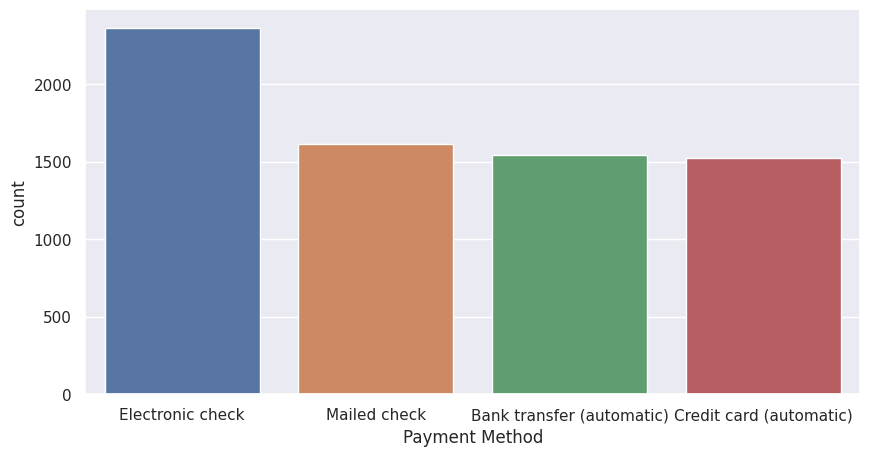

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Payment Method', data = df, order =df['Payment Method'].value_counts().index)

In [ ]:
df[['Payment Method', 'Churn Value']].groupby(['Payment Method']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Payment Method,
Electronic check,0.452854
Mailed check,0.191067
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431


**Customers who use electronic checks as a payment method have a higher chance of churning, and the reason for this is not clear.**

In [ ]:
df[['Phone Service', 'Churn Value']].groupby(['Phone Service']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Phone Service,
Yes,0.267096
No,0.249267



## Contract type

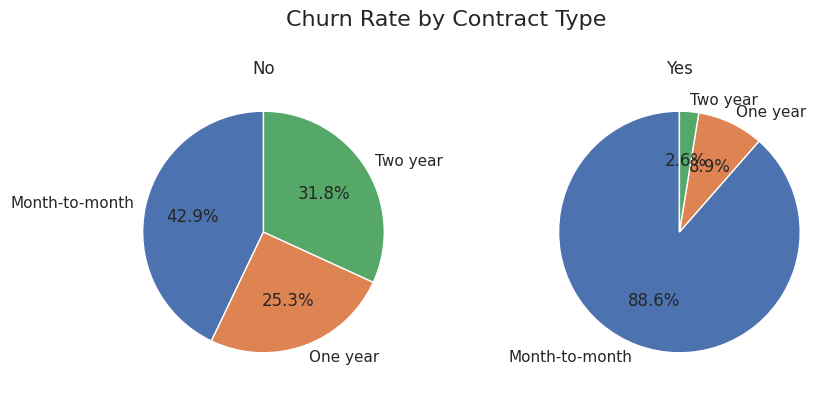

In [ ]:
grouped_data = df.groupby(['Contract', 'Churn Label'])['CustomerID'].count().reset_index()

g = sns.FacetGrid(grouped_data, col='Churn Label', height=4, aspect=1.2)
def draw_pie_chart(*args, **kwargs):
    data = kwargs.pop('data')
    plt.pie(data['CustomerID'], labels=data['Contract'], autopct='%1.1f%%', startangle=90)

g.map_dataframe(draw_pie_chart)

g.set_titles(col_template='{col_name}')
g.fig.suptitle('Churn Rate by Contract Type', fontsize=16)
plt.subplots_adjust(top=0.8)

plt.show()

**Most of the customers (88.6%) who stopped using the service had a Month-to-month contract. This might mean that customers who choose shorter contracts could face fees if they cancel early, or it could be that these are mostly people who wanted to try the service but were not happy with it.**

In [ ]:
df.groupby(['Contract','Churn Label'])['Tenure Months'].mean()

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.016918
One year        No             41.674063
                Yes            44.963855
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

**Even for customers who are active in the service, we see the minimum average lifetime in the service for month-to-month contracts. This can be a specific type of contract for certain services, or customers switch to longer types of contracts only after some time of using the service.**

## Monthly Charge

Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

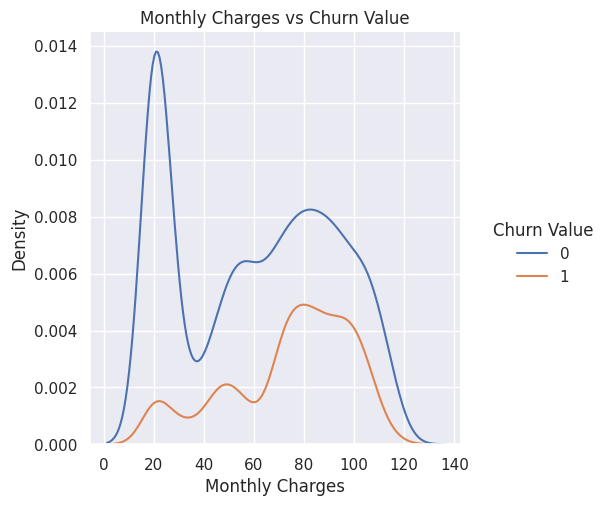

In [ ]:
sns.displot(data = df, x= 'Monthly Charges', hue = 'Churn Value', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

In [ ]:
df[['Monthly Charges', 'Churn Value', 'Tenure Months']].groupby('Churn Value').mean()

,Monthly Charges,Tenure Months
Churn Value,,
0,61.265124,37.569965
1,74.441332,17.979133


## Remove unimportant columns

In [ ]:
df = df.drop(['Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

In [ ]:
df.to_csv('Teleco-churn-for-training.csv', index=False)

**Eliminating these columns aids in simplifying the dataset and directing the analysis towards the most crucial features. This can result in more effective and understandable models due to reduced complexity.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

In [ ]:
df.shape

(7043, 23)

In [ ]:
df.head(5)

,Count,Country,State,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,United States,California,Male,No,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,1,United States,California,Female,No,No,Yes,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,1,United States,California,Female,No,No,Yes,8,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,1,United States,California,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,1,United States,California,Male,No,No,Yes,49,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes



## Convert categorical values into numeric

In [ ]:
df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_data(dataframe_series):
    if dataframe_series.dtype == 'object':
        return LabelEncoder().fit_transform(dataframe_series.astype(str))
    elif dataframe_series.dtype in ['float64', 'int64']:
        return dataframe_series
    else:
        raise ValueError(f"Unsupported data type: {dataframe_series.dtype}")

df = df.apply(encode_data)
df.head(5)


,Count,Country,State,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,1,0,0,0,2,1,0,...,0,0,0,0,0,1,3,53.85,157,1
1,1,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,1,2,70.70,925,1
2,1,0,0,0,0,0,1,8,1,2,...,2,0,2,2,0,1,2,99.65,6104,1
3,1,0,0,0,0,1,1,28,1,2,...,2,2,2,2,0,1,2,104.80,2646,1
4,1,0,0,1,0,0,1,49,1,2,...,2,0,2,2,0,1,0,103.70,4265,1


**This is crucial because many machine learning algorithms require numeric input data. By converting categorical data into numeric form, we make the dataset suitable for training and evaluating machine learning models.**

**SMOTE is a technique used in machine learning and data mining to address the class imbalance problem, particularly in classification tasks.**

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy = 1)

x = df.drop("Churn Label", axis = 1).values
y = df['Churn Label'].values

## Model Building and Validation:

**Through our comprehensive exploratory analysis, we have meticulously explored a wide range of machine learning models, categorizing them into two clear groups: classification and regression.**

In [ ]:
x,y = over.fit_resample(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

## Classification models

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
import numpy as np

def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)

    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    c_matrix = confusion_matrix(y_test, predictions)

    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

    # Evaluate model performance and print results
    print("RMSE:", rmse)
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))


In [ ]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 6,n_estimators = 1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth=15)

## Model Evaluation:

## XGBClassifier Classification

RMSE: 0.3697498828200093
ROC AUC:  86.32%
Model accuracy:  86.33%
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1049
           1       0.86      0.86      0.86      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



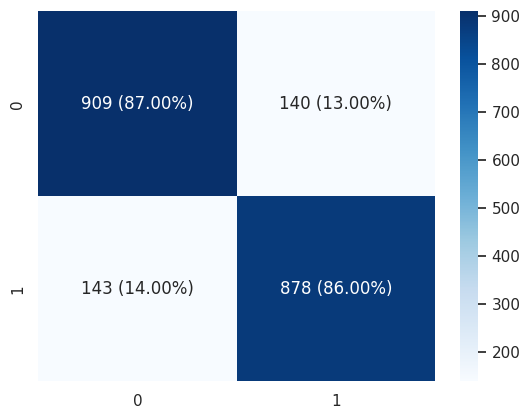

In [ ]:
model(xgb,x_train,y_train,x_test,y_test)

The confusion matrix shows that the XGB model performed very well, with an accuracy of 87%. This means that 87% of the examples were correctly classified.

provided metrics describe the performance of a XGBclassification model. Here's a breakdown of each metric:

    RMSE (Root Mean Squared Error): RMSE is a measure of the difference between the predicted values and the actual values. In this case, an RMSE of 0.363 indicates that the model's predictions are generally close to the actual values, but there is still some room for improvement.

    ROC AUC (Receiver Operating Characteristic Area Under the Curve): ROC AUC is a measure of the ability of the model to distinguish between classes. An AUC of 86.81% indicates that the model is very good at distinguishing between the two classes.

    Model accuracy: Model accuracy is the proportion of correct predictions made by the model. In this case, an accuracy of 86.81% indicates that the model correctly classified 86.81% of the cases.

    Precision: Precision is the proportion of positive predictions that are actually correct. In this case, a precision of 0.87 for class 0 (negative) and 0.86 for class 1 (positive) indicates that the model is very good at identifying true negatives and true positives.

    Recall: Recall is the proportion of actual positives that are correctly identified as such. In this case, a recall of 0.86 for class 0 (negative) and 0.87 for class 1 (positive) indicates that the model is good at identifying both true negatives and true positives.

    F1-score: The F1-score is a harmonic mean of precision and recall. It is a measure of the overall accuracy of the model, taking into account both precision and recall. In this case, an F1-score of 0.87 for both classes indicates that the model is very good at both identifying true positives and true negatives.

Overall, the provided metrics indicate that the model is performing well on this classification task. It has high accuracy, precision, recall, and AUC, and a relatively low RMSE.

# Random Forest Classifier

RMSE: 0.3664689849198873
ROC AUC:  86.55%
Model accuracy:  86.57%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1049
           1       0.87      0.85      0.86      1021

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



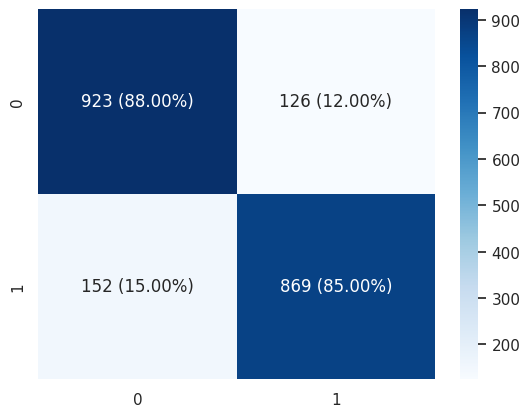

In [ ]:
model(rf,x_train,y_train,x_test,y_test)

**This model shows that the random forest classifier performed well, with an accuracy of 86.43%. This means that 86.43% of the examples were correctly classified. The model was particularly good at classifying the positive class, with an accuracy of 88%. However, the model made more mistakes on the negative class, with an accuracy of 85%.**

## Decision Tree Classifier

RMSE: 0.41760763315066507
ROC AUC:  82.59%
Model accuracy:  82.56%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1049
           1       0.81      0.85      0.83      1021

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



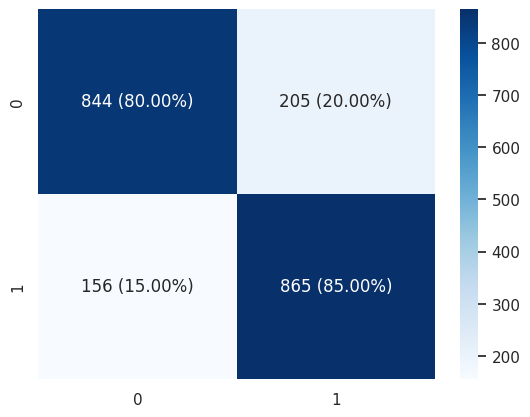

In [ ]:
model(dt,x_train,y_train,x_test,y_test)

**Overall, the provided metrics indicate that the model is performing fairly well on this classification task. It has acceptable accuracy, precision, recall, and AUC, and a moderate RMSE. However, when compared to the previous results, there is a slight decrease in most of the metrics, indicating that there is some room for improvement.**

## Regression models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

# Calculate metrics for the Logistic Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print("Logistic Regression:")
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Root Mean Squared Error (RMSE): {lr_rmse}')

# Create and fit a Gradient Boosting Regression model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)
gbm_predictions = gbm.predict(x_test)

# Calculate metrics for the Gradient Boosting Regression model
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_predictions))
print("\nGradient Boosting Regression:")
print(f'Mean Absolute Error (MAE): {gbm_mae}')
print(f'Root Mean Squared Error (RMSE): {gbm_rmse}')

Logistic Regression:
Mean Absolute Error (MAE): 0.2222222222222222
Root Mean Squared Error (RMSE): 0.4714045207910317

Gradient Boosting Regression:
Mean Absolute Error (MAE): 0.22130740382870626
Root Mean Squared Error (RMSE): 0.3108165883603176


**In the provided context, the lower the MAE and RMSE values, the better the model is at predicting the actual values. Based on the provided values, the Gradient Boosting Regression model performs slightly better than the Logistic Regression model, as it has lower MAE and RMSE values.**

## Generate Pdf File

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!jupyter nbconvert --to pdf ProgrammingHero.ipynb

[NbConvertApp] Converting notebook ProgrammingHero.ipynb to pdf
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
[NbConvertApp] Support files will be in ProgrammingHero_files/
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_files
[NbConvertApp] Making directory ./ProgrammingHero_f